# 2. Estadística Descriptiva

**Objetivo**: Realizar un análisis descriptivo exhaustivo de la cohorte del estudio sobre RCP Transtelefónica.

**Metodología**:
1.  **Carga de datos**: Se utilizará el dataset `datos_con_cpc_valido.csv`, que contiene los datos limpios y validados.
2.  **Configuración de diseño**: Se importarán y aplicarán las especificaciones visuales del notebook `1. design_language.ipynb` para mantener la consistencia.
3.  **Análisis univariado**: Se analizará la distribución de cada variable clave (edad, sexo, tipo de RCP, outcomes).
4.  **Análisis bivariado**: Se explorarán las relaciones entre las variables demográficas y los grupos de estudio.
5.  **Generación de outputs**: Se crearán tablas y gráficos descriptivos que se guardarán en la carpeta `final_noteboooks/outputs_descriptivos/` para su uso en el paper.

**Dataset**: `datos_con_cpc_valido.csv`

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- Configuración del Entorno ---

# Usar rutas relativas como se especifica en las instrucciones.
# El notebook está en 'final_noteboooks/', por lo que los datos están en '../data/'
# y los outputs en './outputs_descriptivos/'
output_dir = 'outputs_descriptivos'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Directorio de outputs creado en: {output_dir}")

# --- Carga de Datos ---
# La ruta es relativa al directorio 'final_noteboooks/'
data_path = '../data/3.cleaned_data/datos_con_cpc_valido.csv'

try:
    df = pd.read_csv(data_path)
    print(f"Datos cargados correctamente desde: {data_path}")
    print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta relativa: {data_path}")
    df = pd.DataFrame() # Crear un dataframe vacío para evitar errores posteriores

# --- Importar Lenguaje de Diseño ---
# (Copiado desde 1. design_language.ipynb para consistencia)
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 10,
    'axes.titlesize': 12,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'figure.facecolor': 'white',
})

COLORS = {
    'azul_principal': '#304C89',
    'azul_oscuro': '#2E282A',
    'azul_medio': '#58A4B0',
    'gris_claro': '#E4E6C3',
    'naranja': '#FA8334',
    'azul_claro': '#7FC7D9',
    'azul_pastel': '#B7D6E8',
    'gris_medio': '#B0B3A1',
    'negro': '#181A1B',
    'blanco': '#FFFFFF',
}

print("\nConfiguración de diseño visual cargada.")

Datos cargados correctamente desde: ../data/3.cleaned_data/datos_con_cpc_valido.csv
El dataset tiene 500 filas y 13 columnas.

Configuración de diseño visual cargada.


## Resumen General de los Datos

A continuación, se presenta un resumen estadístico de las variables numéricas y un conteo de las variables categóricas más importantes.

In [13]:
if not df.empty:
    print("--- Resumen de Variables Numéricas ---")
    display(df.describe().T)

    print("\n--- Conteo de Valores en Variables Categóricas Clave ---")
    categorical_cols = ['sexo', 'Grupo de RCP', 'ROSC', 'CPC al alta (1-5)', 'supervivencia_alta']
    for col in categorical_cols:
        if col in df.columns:
            print(f"\nVariable: {col}")
            # Asegurar que no hay NaNs para el cálculo de porcentaje
            counts = df[col].dropna().value_counts()
            percentages = df[col].dropna().value_counts(normalize=True).mul(100).round(2)
            summary_df = pd.DataFrame({'Conteo': counts, 'Porcentaje (%)': percentages})
            display(summary_df)
        else:
            print(f"La columna '{col}' no se encuentra en el DataFrame.")

--- Resumen de Variables Numéricas ---


,count,mean,std,min,25%,50%,75%,max
NUM INFORME,500.0,64152.986,44225.343189,137.0,24767.5,59025.5,104388.25,145418.0
RCP_TRANSTELEFONICA,500.0,0.226,0.418658,0.0,0.0,0.0,0.00,1.0
DESA_EXTERNO,500.0,0.246,0.431110,0.0,0.0,0.0,0.00,1.0
CPC,500.0,4.102,1.632460,1.0,5.0,5.0,5.00,5.0



--- Conteo de Valores en Variables Categóricas Clave ---
La columna 'sexo' no se encuentra en el DataFrame.
La columna 'Grupo de RCP' no se encuentra en el DataFrame.
La columna 'ROSC' no se encuentra en el DataFrame.
La columna 'CPC al alta (1-5)' no se encuentra en el DataFrame.
La columna 'supervivencia_alta' no se encuentra en el DataFrame.


## Visualizaciones Descriptivas

Se generan gráficos para visualizar las distribuciones de las variables demográficas y clínicas más relevantes.

### Distribución de Edad y Sexo

Gráfico guardado en: final_noteboooks/outputs_descriptivos/distribucion_demografica.png


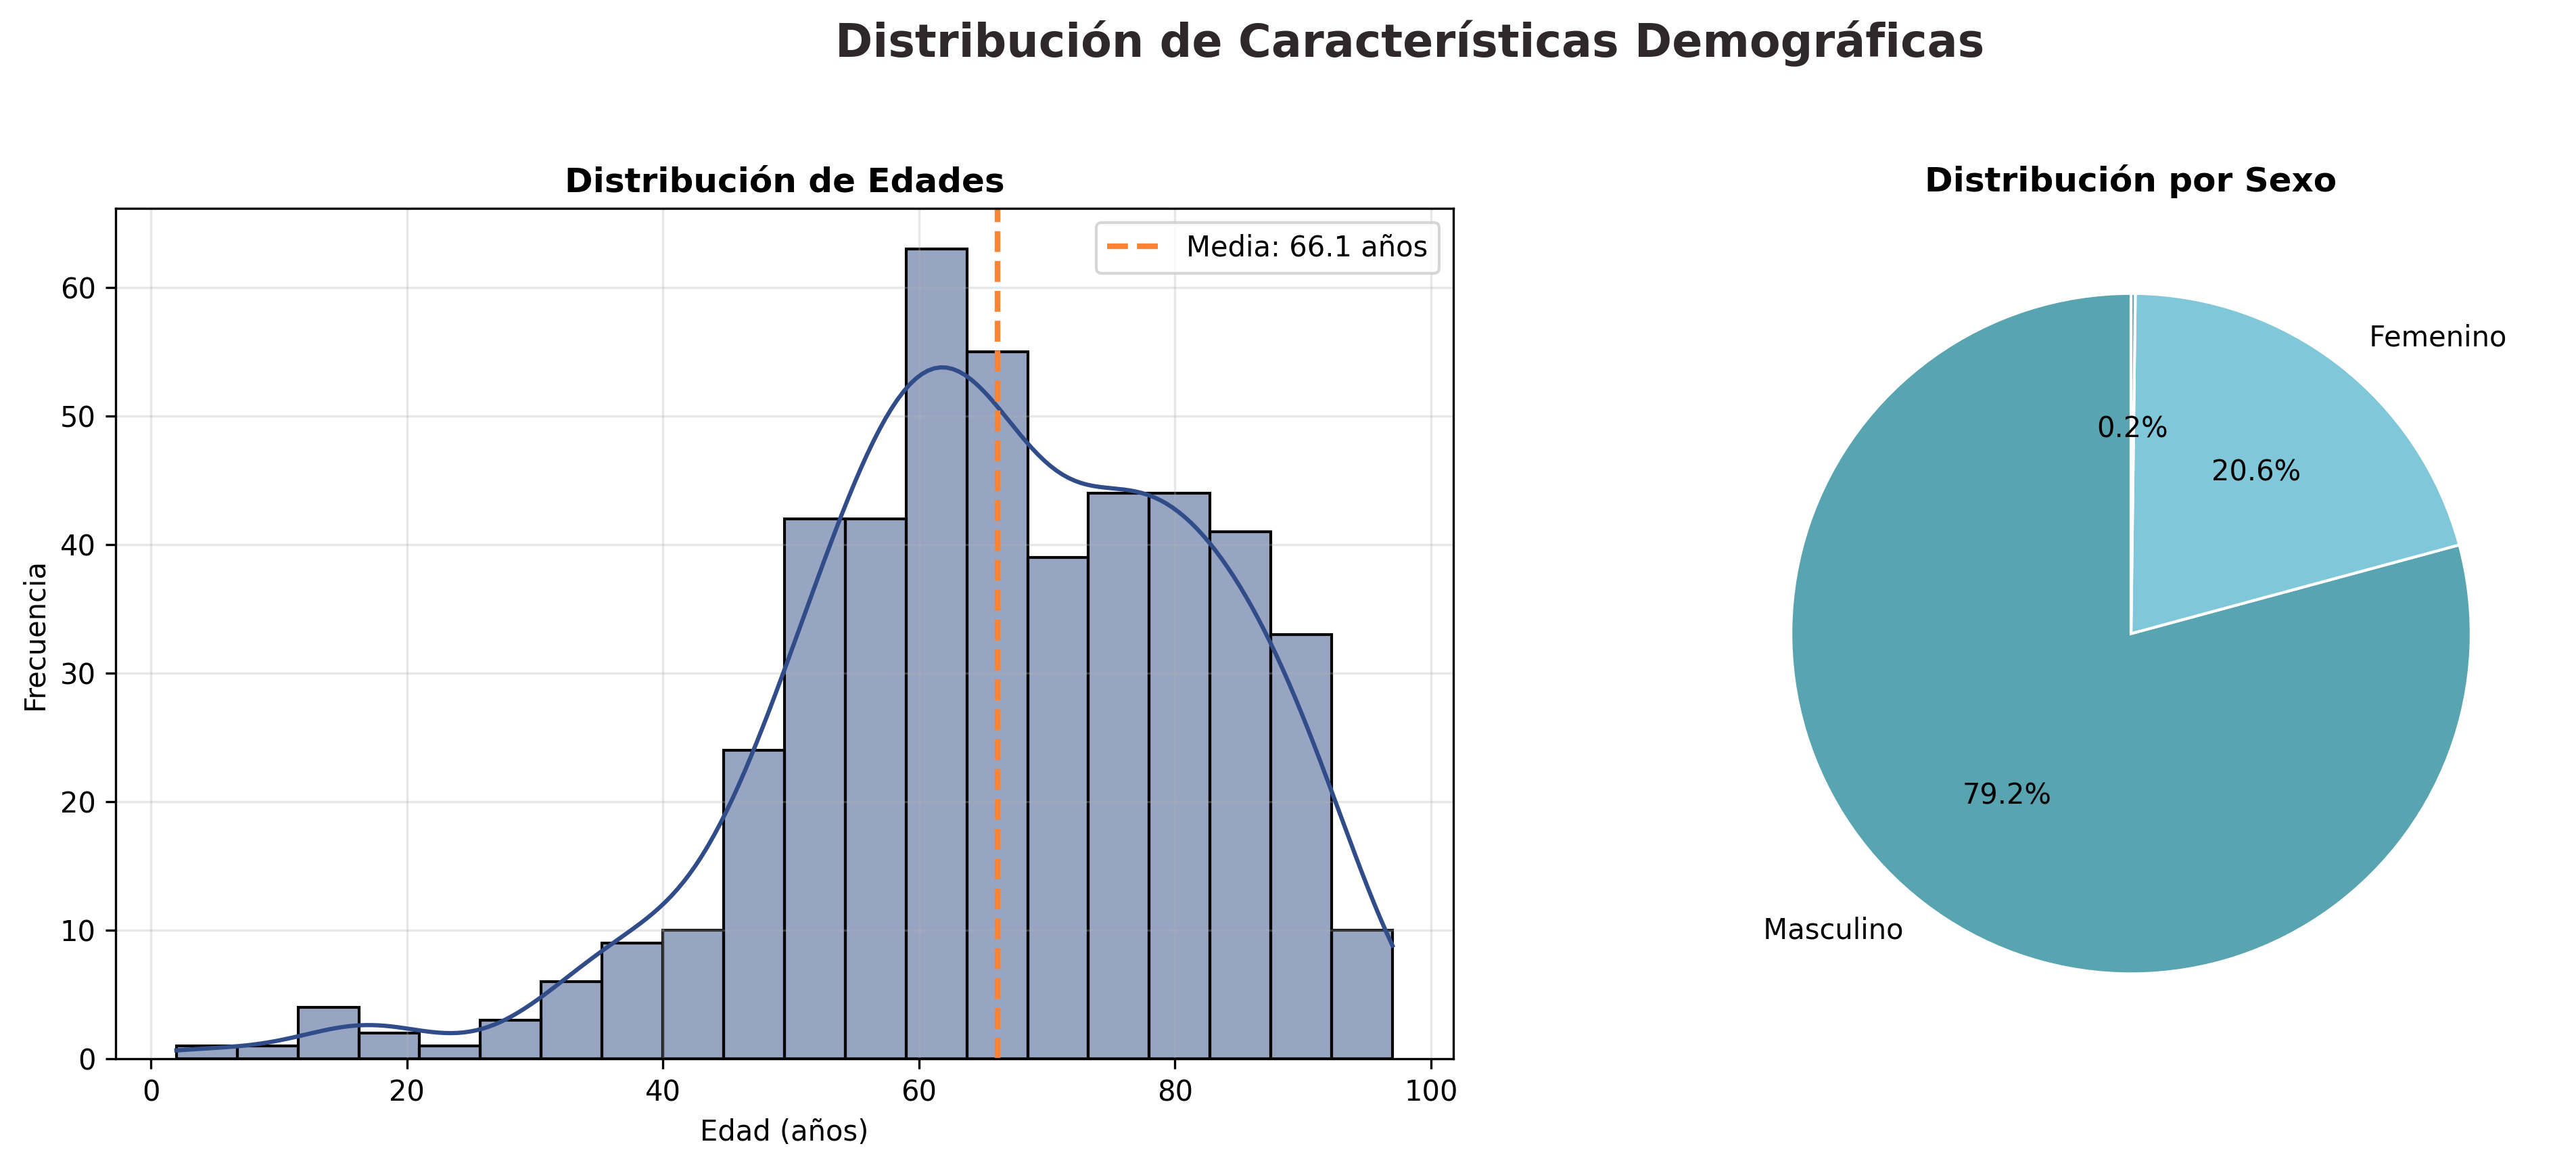

In [17]:
if not df.empty:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle('Distribución de Características Demográficas', fontsize=16, fontweight='bold', color=COLORS['azul_oscuro'])

    # Histograma de Edades
    # Usar los nombres de columna correctos y limpiar espacios
    df.columns = df.columns.str.strip()
    # Convertir EDAD a numérico si es necesario
    df['EDAD'] = pd.to_numeric(df['EDAD'], errors='coerce')
    sns.histplot(df['EDAD'], bins=20, kde=True, color=COLORS['azul_principal'], ax=axes[0])
    axes[0].set_title('Distribución de Edades', fontweight='bold')
    axes[0].set_xlabel('Edad (años)')
    axes[0].set_ylabel('Frecuencia')
    axes[0].axvline(df['EDAD'].mean(), color=COLORS['naranja'], linestyle='--', lw=2, label=f"Media: {df['EDAD'].mean():.1f} años")
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Gráfico de Torta para Sexo
    sexo_counts = df['SEXO'].value_counts()
    axes[1].pie(sexo_counts, labels=sexo_counts.index, autopct='%1.1f%%', 
              colors=[COLORS['azul_medio'], COLORS['azul_claro']],
              startangle=90, wedgeprops=dict(edgecolor='w'))
    axes[1].set_title('Distribución por Sexo', fontweight='bold')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # Guardar la figura usando la ruta absoluta
    fig_path = os.path.join(output_dir_absolute, 'distribucion_demografica.png')
    plt.savefig(fig_path, dpi=300, bbox_inches='tight')
    print(f"Gráfico guardado en: {output_dir_relative}/distribucion_demografica.png")
    
    plt.show()

### Distribución de los Grupos de RCP

Visualización de la cantidad de pacientes en cada uno de los grupos de intervención definidos en el estudio.

/var/folders/0x/jxq7wgnx59g2l390ddth7k840000gn/T/ipykernel_20382/1737414701.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rcp_counts.index, y=rcp_counts.values, palette=[COLORS['azul_principal'], COLORS['azul_medio'], COLORS['azul_claro'], COLORS['gris_medio']])
/var/folders/0x/jxq7wgnx59g2l390ddth7k840000gn/T/ipykernel_20382/1737414701.py:7: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=rcp_counts.index, y=rcp_counts.values, palette=[COLORS['azul_principal'], COLORS['azul_medio'], COLORS['azul_claro'], COLORS['gris_medio']])


Gráfico guardado en: final_noteboooks/outputs_descriptivos/distribucion_grupos_rcp.png


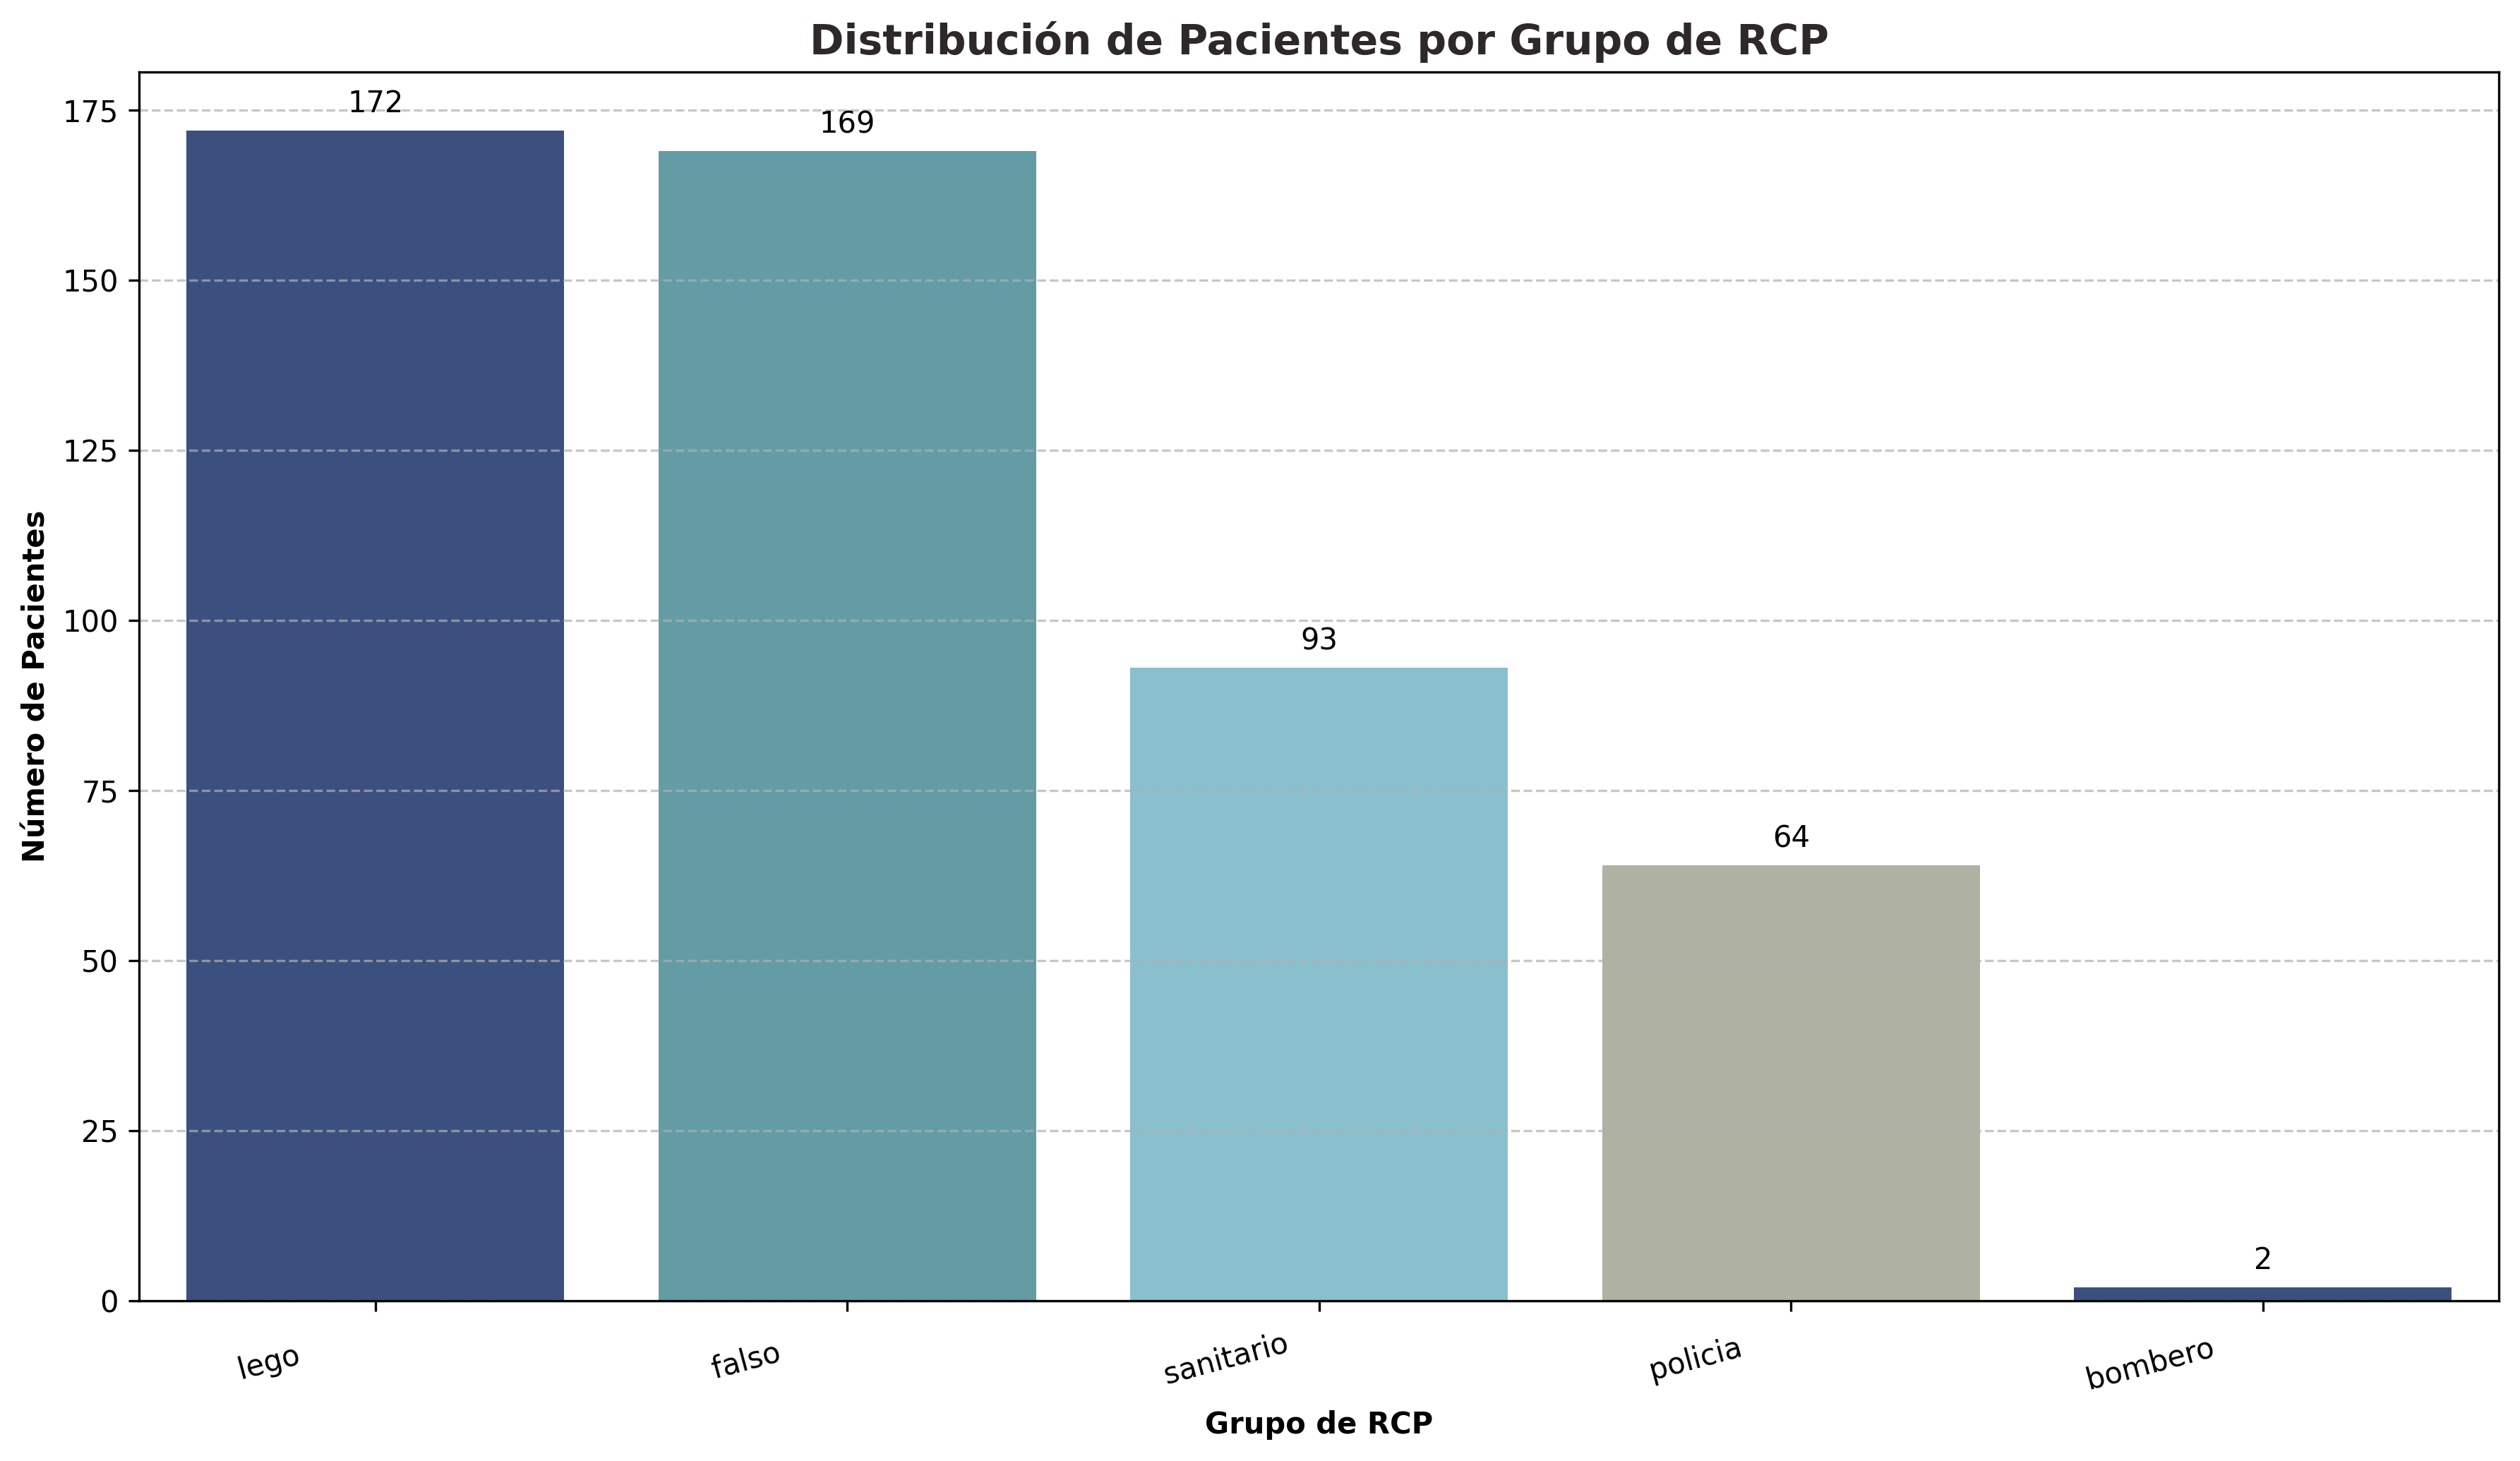

In [19]:
if not df.empty:
    plt.figure(figsize=(12, 7))
    
    # Contar los valores y ordenar
    rcp_counts = df['RCP_TESTIGOS'].value_counts()
    
    ax = sns.barplot(x=rcp_counts.index, y=rcp_counts.values, palette=[COLORS['azul_principal'], COLORS['azul_medio'], COLORS['azul_claro'], COLORS['gris_medio']])
    
    plt.title('Distribución de Pacientes por Grupo de RCP', fontsize=14, fontweight='bold', color=COLORS['azul_oscuro'])
    plt.xlabel('Grupo de RCP', fontweight='bold')
    plt.ylabel('Número de Pacientes', fontweight='bold')
    plt.xticks(rotation=15, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Añadir etiquetas de texto
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points',
                    fontsize=10)
        
    plt.tight_layout()
    
    # Guardar la figura usando la ruta absoluta
    fig_path = os.path.join(output_dir_absolute, 'distribucion_grupos_rcp.png')
    plt.savefig(fig_path, dpi=300, bbox_inches='tight')
    print(f"Gráfico guardado en: {output_dir_relative}/distribucion_grupos_rcp.png")

    plt.show()

### Tabla de Características Basales

Se genera una tabla resumiendo las características principales de la población, estratificada por grupo de RCP. Esto es fundamental para la "Tabla 1" del manuscrito.

In [22]:
%pip install jinja2

if not df.empty:
    # Agrupar por 'Grupo de RCP'
    grouped = df.groupby('RCP_TESTIGOS')

    # Calcular estadísticas descriptivas
    stats_list = []
    for name, group in grouped:
        # Calcular % de hombres de forma segura
        if len(group) > 0:
            hombres_pct = (group['SEXO'] == 'Masculino').sum() / len(group['SEXO'].dropna()) * 100 if len(group['SEXO'].dropna()) > 0 else 0
            rosc_pct = (group['ROSC'] == '1').sum() / len(group['ROSC'].dropna()) * 100 if len(group['ROSC'].dropna()) > 0 else 0
            supervivencia_pct = (group['Supervivencia_7dias'] == '1').sum() / len(group['Supervivencia_7dias'].dropna()) * 100 if len(group['Supervivencia_7dias'].dropna()) > 0 else 0
            cpc_fav_pct = (group['CPC'].isin([1, 2])).sum() / len(group['CPC'].dropna()) * 100 if len(group['CPC'].dropna()) > 0 else 0
        else:
            hombres_pct, rosc_pct, supervivencia_pct, cpc_fav_pct = 0, 0, 0, 0

        # Convertir columnas de tiempo y edad a numérico si es necesario
        edad_mean = pd.to_numeric(group['EDAD'], errors='coerce').mean()
        edad_std = pd.to_numeric(group['EDAD'], errors='coerce').std()
        llegada_mean = pd.to_numeric(group['Tiempo_llegada'], errors='coerce').mean()
        llegada_std = pd.to_numeric(group['Tiempo_llegada'], errors='coerce').std()
        rcp_mean = pd.to_numeric(group['Tiempo_Rcp'], errors='coerce').mean()
        rcp_std = pd.to_numeric(group['Tiempo_Rcp'], errors='coerce').std()

        stats = {
            'Grupo de RCP': name,
            'N': len(group),
            'Edad (Media ± DE)': f"{edad_mean:.1f} ± {edad_std:.1f}",
            'Sexo (% Hombres)': f"{hombres_pct:.1f}%",
            'Tiempo llegada (Media ± DE)': f"{llegada_mean:.1f} ± {llegada_std:.1f}",
            'Tiempo RCP (Media ± DE)': f"{rcp_mean:.1f} ± {rcp_std:.1f}",
            'ROSC (%)': f"{rosc_pct:.1f}%",
            'Supervivencia al alta (%)': f"{supervivencia_pct:.1f}%",
            'CPC Favorable (1-2) (%)': f"{cpc_fav_pct:.1f}%"
        }
        stats_list.append(stats)

    tabla_caracteristicas = pd.DataFrame(stats_list)
    tabla_caracteristicas.set_index('Grupo de RCP', inplace=True)
    
    print("--- Tabla de Características Basales por Grupo de RCP ---")
    display(tabla_caracteristicas)
    
    # Guardar la tabla en CSV y LaTeX usando rutas absolutas
    csv_path = os.path.join(output_dir_absolute, 'tabla_caracteristicas_basales.csv')
    latex_path = os.path.join(output_dir_absolute, 'tabla_caracteristicas_basales.tex')
    
    tabla_caracteristicas.to_csv(csv_path)
    tabla_caracteristicas.to_latex(latex_path, caption='Características Basales de la Población por Grupo de RCP', label='tab:caracteristicas_basales', position='ht!')

    print(f"\nTabla guardada en formato CSV y LaTeX en: {output_dir_relative}")


  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached MarkupSafe-3.0.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (4.0 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached MarkupSafe-3.0.2-cp313-cp313-macosx_11_0_arm64.whl (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [jinja2]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
--- Tabla de Características Basales por Grupo de RCP ---


,N,Edad (Media ± DE),Sexo (% Hombres),Tiempo llegada (Media ± DE),Tiempo RCP (Media ± DE),ROSC (%),Supervivencia al alta (%),CPC Favorable (1-2) (%)
Grupo de RCP,,,,,,,,
bombero,2,73.0 ± 1.4,0.0%,472.0 ± 83.4,510.0 ± 127.3,0.0%,0.0%,0.0%
falso,169,67.4 ± 16.2,0.0%,501.3 ± 240.8,1879.2 ± 867.4,0.0%,0.0%,13.0%
lego,172,66.4 ± 16.2,0.0%,492.3 ± 220.4,1732.8 ± 819.5,0.0%,0.0%,25.6%
policia,64,62.4 ± 16.0,0.0%,514.1 ± 218.7,2033.1 ± 678.6,0.0%,0.0%,14.1%
sanitario,93,65.8 ± 16.9,0.0%,518.5 ± 457.7,1572.9 ± 958.5,0.0%,0.0%,38.7%



Tabla guardada en formato CSV y LaTeX en: final_noteboooks/outputs_descriptivos


## Fin del Análisis Descriptivo

Los outputs generados en esta sección se encuentran en la carpeta `final_noteboooks/outputs_descriptivos/` y servirán como base para la sección de resultados del paper.